In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Membaca gambar

In [9]:
img = cv2.imread('Nama.jpg')  
if img is None:
    print("Citra tidak dapat dimuat. Pastikan path gambar benar.")
else:
    print("Citra berhasil dimuat.")

Citra berhasil dimuat.


### Konversi gambar ke HSV

In [10]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

### ===== MENCARI AMBANG BATAS =====

In [11]:
# Format: [H_min, S_min, V_min], [H_max, S_max, V_max]
batas_merah = ([0, 100, 100], [10, 255, 255])         
batas_merah2 = ([160, 100, 100], [179, 255, 255])     
batas_hijau = ([40, 50, 50], [80, 255, 255])
batas_biru = ([100, 100, 100], [130, 255, 255])

# Konversi ke np.array
lower_red1 = np.array(batas_merah[0])
upper_red1 = np.array(batas_merah[1])
lower_red2 = np.array(batas_merah2[0])
upper_red2 = np.array(batas_merah2[1])
lower_green = np.array(batas_hijau[0])
upper_green = np.array(batas_hijau[1])
lower_blue = np.array(batas_biru[0])
upper_blue = np.array(batas_biru[1])

# Masking warna
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

### Tampilkan hasil

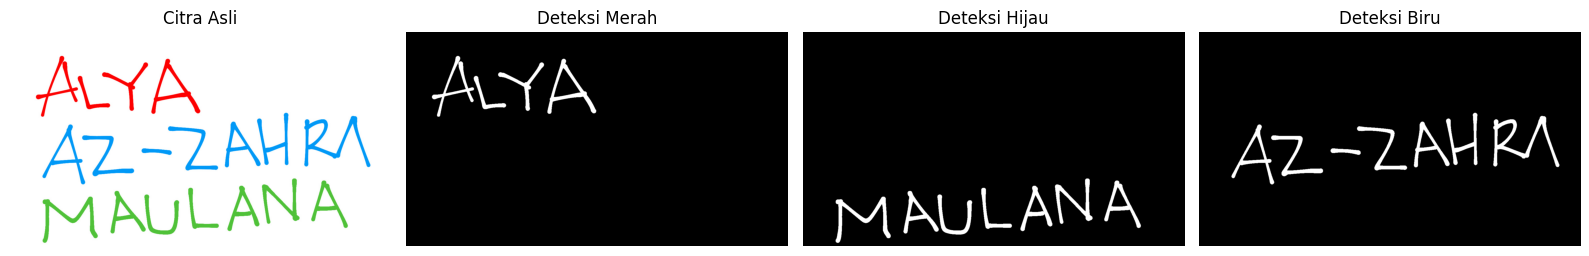

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Citra Asli')
axs[0].axis('off')

axs[1].imshow(mask_red, cmap='gray')
axs[1].set_title('Deteksi Merah')
axs[1].axis('off')

axs[2].imshow(mask_green, cmap='gray')
axs[2].set_title('Deteksi Hijau')
axs[2].axis('off')

axs[3].imshow(mask_blue, cmap='gray')
axs[3].set_title('Deteksi Biru')
axs[3].axis('off')

plt.tight_layout()
plt.show()

In [13]:
print("Ambang batas warna (HSV):")
ambang_list = [
    ("Merah 1", lower_red1.tolist(), upper_red1.tolist()),
    ("Merah 2", lower_red2.tolist(), upper_red2.tolist()),
    ("Hijau", lower_green.tolist(), upper_green.tolist()),
    ("Biru", lower_blue.tolist(), upper_blue.tolist())
]

ambang_sorted = sorted(ambang_list, key=lambda x: x[1][0])

for nama, low, up in ambang_sorted:
    print(f"{nama}: Lower = {low}, Upper = {up}")

Ambang batas warna (HSV):
Merah 1: Lower = [0, 100, 100], Upper = [10, 255, 255]
Hijau: Lower = [40, 50, 50], Upper = [80, 255, 255]
Biru: Lower = [100, 100, 100], Upper = [130, 255, 255]
Merah 2: Lower = [160, 100, 100], Upper = [179, 255, 255]


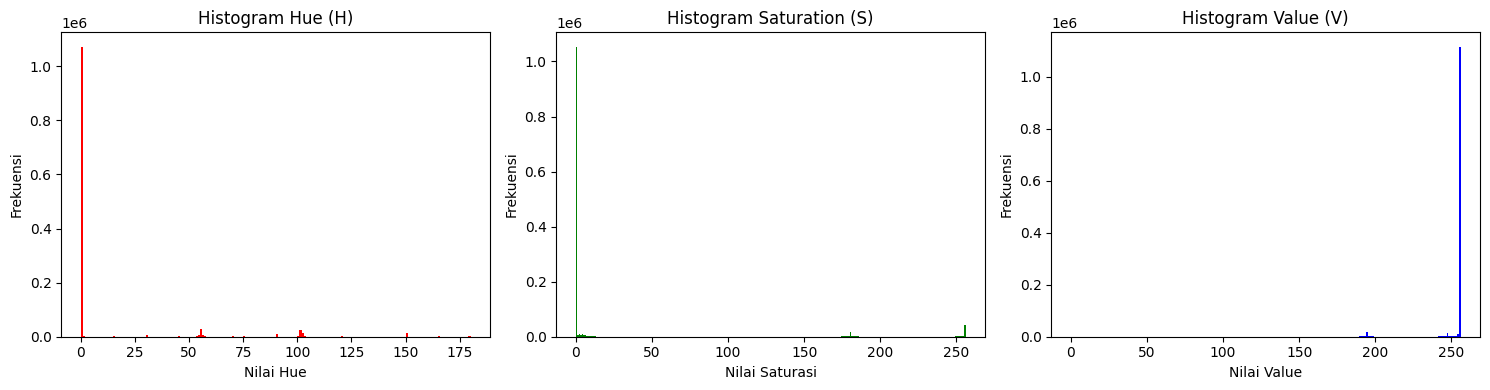

In [14]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue, sat, val = cv2.split(hsv_img)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(hue.ravel(), bins=180, range=(0, 180), color='red')
plt.title('Histogram Hue (H)')
plt.xlabel('Nilai Hue')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.hist(sat.ravel(), bins=256, range=(0, 256), color='green')
plt.title('Histogram Saturation (S)')
plt.xlabel('Nilai Saturasi')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.hist(val.ravel(), bins=256, range=(0, 256), color='blue')
plt.title('Histogram Value (V)')
plt.xlabel('Nilai Value')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()